<a href="https://colab.research.google.com/github/drigovieira/student-passing-rate-prediction/blob/main/Previs%C3%A3o_de_Aprova%C3%A7%C3%A3o_de_Alunos_com_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [242]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [243]:
df = pd.read_excel('correlacao_linear_simples_exercicio.xlsx')

In [244]:
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UF        27 non-null     object
 1   ano_2015  27 non-null     int64 
 2   ano_2016  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


In [246]:
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [247]:
df = df.sort_values('UF').reset_index(drop=True)
df['id'] = range(1, len(df) + 1)
df.head()

,UF,ano_2015,ano_2016,id
0,Acre,79,81,1
1,Alagoas,75,77,2
2,Amapa,76,75,3
3,Amazonas,83,85,4
4,Bahia,76,75,5


In [248]:
df

,UF,ano_2015,ano_2016,id
0,Acre,79,81,1
1,Alagoas,75,77,2
2,Amapa,76,75,3
3,Amazonas,83,85,4
4,Bahia,76,75,5
5,Ceara,86,85,6
6,DF,82,83,7
7,ES,80,81,8
8,Goias,86,87,9
9,MG,81,81,10


In [249]:
df_numeric = df.select_dtypes(include=['int', 'float'])
df_numeric.head()

,ano_2015,ano_2016,id
0,79,81,1
1,75,77,2
2,76,75,3
3,83,85,4
4,76,75,5


In [250]:
correlation_matrix = df_numeric.drop(columns=['id'])
correlation_matrix.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [253]:
df_numeric['ratio'] = df_numeric['ano_2015'] / df_numeric['ano_2016']
print(df_numeric['ratio'])

0     0.975309
1     0.974026
2     1.013333
3     0.976471
4     1.013333
5     1.011765
6     0.987952
7     0.987654
8     0.988506
9     1.000000
10    0.974359
11    0.971429
12    1.000000
13    0.960526
14    1.012821
15    1.000000
16    0.978022
17    0.987654
18    1.064103
19    0.986667
20    1.027027
21    0.905882
22    0.987805
23    0.975610
24    1.011494
25    0.959459
26    0.987805
Name: ratio, dtype: float64


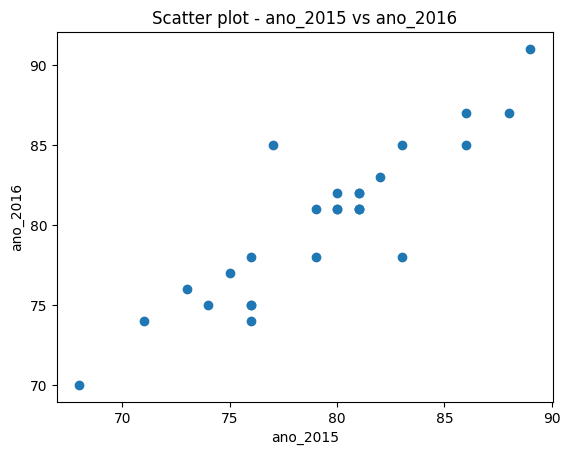

In [254]:

plt.scatter(df_numeric['ano_2015'], df_numeric['ano_2016'])
plt.xlabel('ano_2015')
plt.ylabel('ano_2016')
plt.title('Scatter plot - ano_2015 vs ano_2016')
plt.show()

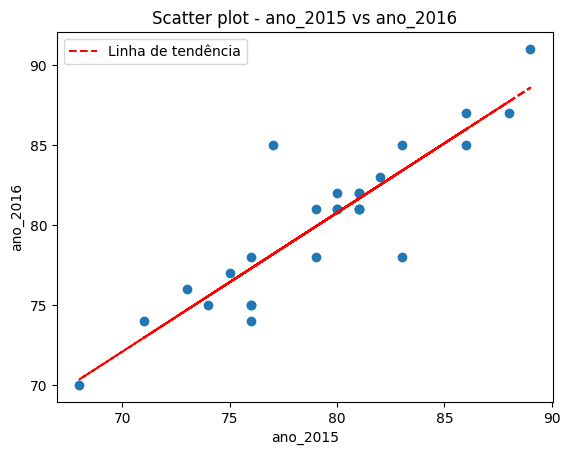

In [261]:
x = df_numeric['ano_2015']
y = df_numeric['ano_2016']

slope, intercept = np.polyfit(x, y, 1)

regression_line = slope * x + intercept

plt.scatter(x, y)
plt.plot(x, regression_line, color='red', linestyle='--', label='Linha de tendência')
plt.xlabel('ano_2015')
plt.ylabel('ano_2016')
plt.title('Scatter plot - ano_2015 vs ano_2016')
plt.legend()
plt.show()

In [255]:
import statsmodels.api as sm

In [256]:
Y = df_numeric.ano_2015
X = sm.add_constant(df_numeric.ano_2015)

In [257]:
resulta_regressao = sm.OLS(Y, X).fit()

In [258]:
print(resulta_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2015   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.096e+29
Date:                Wed, 11 Dec 2024   Prob (F-statistic):               0.00
Time:                        13:54:56   Log-Likelihood:                 803.37
No. Observations:                  27   AIC:                            -1603.
Df Residuals:                      25   BIC:                            -1600.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.908e-14   9.44e-14     -0.414      0.6

In [259]:
df_numeric['Y_previsto'] = resulta_regressao.predict()
df_numeric.head()

,ano_2015,ano_2016,id,ratio,Y_previsto
0,79,81,1,0.975309,79.0
1,75,77,2,0.974026,75.0
2,76,75,3,1.013333,76.0
3,83,85,4,0.976471,83.0
4,76,75,5,1.013333,76.0


In [260]:
df_numeric['residuo'] = round(df_numeric['Y_previsto'] - df_numeric['ano_2016'], 0)
df_numeric

,ano_2015,ano_2016,id,ratio,Y_previsto,residuo
0,79,81,1,0.975309,79.0,-2.0
1,75,77,2,0.974026,75.0,-2.0
2,76,75,3,1.013333,76.0,1.0
3,83,85,4,0.976471,83.0,-2.0
4,76,75,5,1.013333,76.0,1.0
5,86,85,6,1.011765,86.0,1.0
6,82,83,7,0.987952,82.0,-1.0
7,80,81,8,0.987654,80.0,-1.0
8,86,87,9,0.988506,86.0,-1.0
9,81,81,10,1.000000,81.0,0.0
